In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('D:\\AI\\course\\netflix1.csv')


Read the Data

In [8]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [9]:
df.shape

(8790, 10)

Exploring the Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [11]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [12]:
df.duplicated().sum()

0

Cleaning the Data

In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [14]:
df.rename(columns={'date_added':'Date'},inplace=True)

In [15]:
df['Date']=pd.to_datetime(df['Date'])

In [16]:
df.describe()

,Date,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


Analysis Vusalization

Total Content on Netflix


In [17]:
types=df['type'].value_counts().reset_index()
types

,type,count
0,Movie,6126
1,TV Show,2664


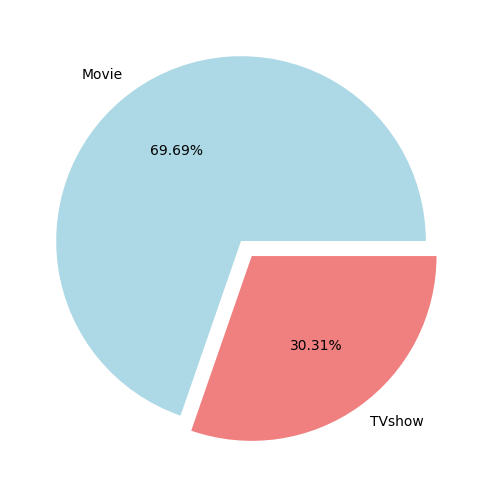

In [18]:
plt.figure(figsize=(20,6))
plt.pie(types['count'],labels=['Movie','TVshow'],autopct='%1.2f%%',explode=[0,0.1],colors=['lightblue', 'lightcoral']  )
plt.show()

In [19]:
df['director'].value_counts().head()

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Name: count, dtype: int64

In [20]:
not_given_dir=df['director'].value_counts().get('Not Given', 0)
print(not_given_dir)

2588


In [21]:
all_dir = df['director'].value_counts().sum()
given_dir=all_dir-not_given_dir
print(given_dir)

6202


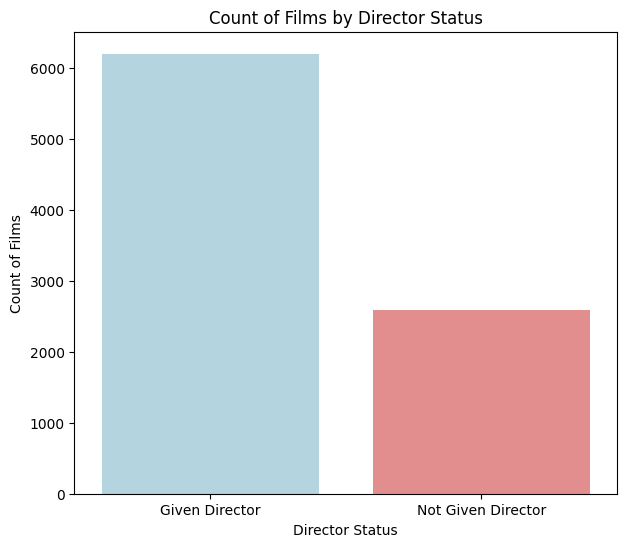

In [22]:
counts = pd.DataFrame({
    'director_status': ['Given Director', 'Not Given Director'],
    'count': [given_dir, not_given_dir]
})
plt.figure(figsize=(7, 6))
sns.barplot(x='director_status', y='count', data=counts, palette=['lightblue', 'lightcoral'])
plt.title('Count of Films by Director Status')
plt.xlabel('Director Status')
plt.ylabel('Count of Films')
plt.xticks(rotation=0)  
plt.show()

Top TV Show & Movies

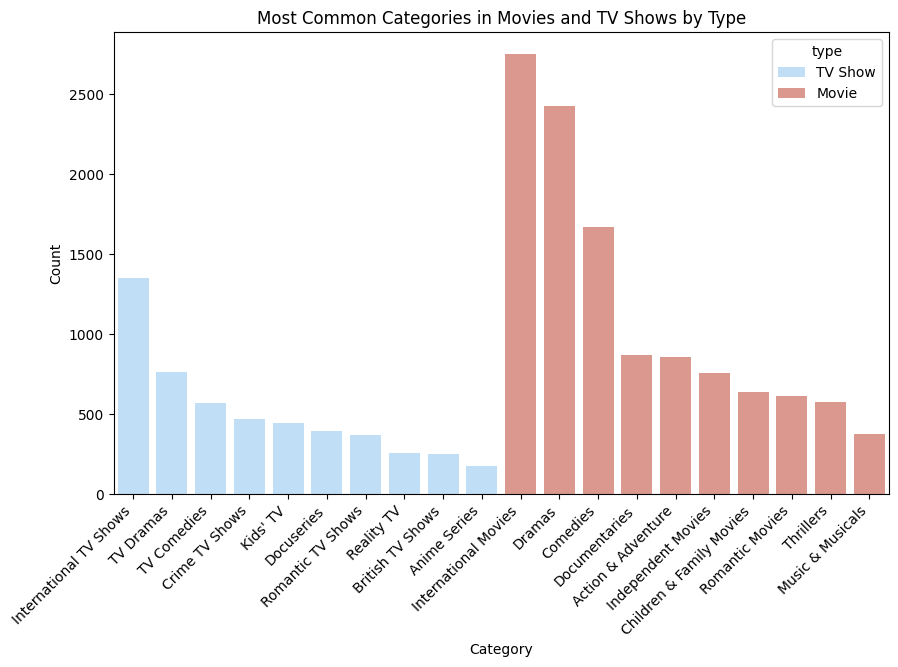

In [23]:
df_split = df.assign(category=df['listed_in'].str.split(', ')).explode('category')
category_count = df_split.groupby(['type', 'category']).size().reset_index(name='count')
category_count = category_count.sort_values(['type', 'count'], ascending=False)
category_df = category_count.groupby('type').head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_df, 
    x='category', 
    y='count', 
    hue='type', 
    palette=['#B7E0FF', '#E78F81']
)
plt.title('Most Common Categories in Movies and TV Shows by Type')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Yearly Trend of Movie and TV Show Releases

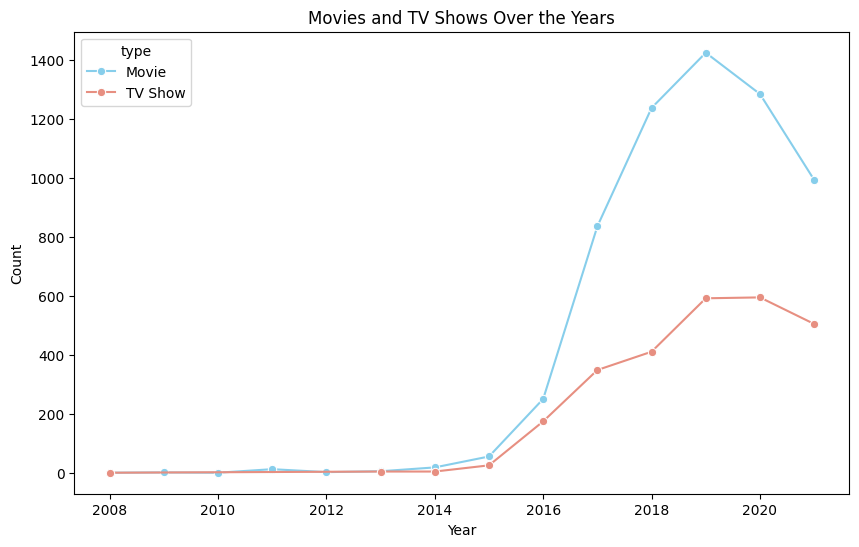

In [28]:
df['year'] = df['Date'].dt.year
cnt_years = df.groupby(['type', 'year']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=cnt_years, 
    x='year', 
    y='count', 
    hue='type', 
    marker='o', 
    palette=['skyblue', '#E78F81']
)
plt.title('Movies and TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

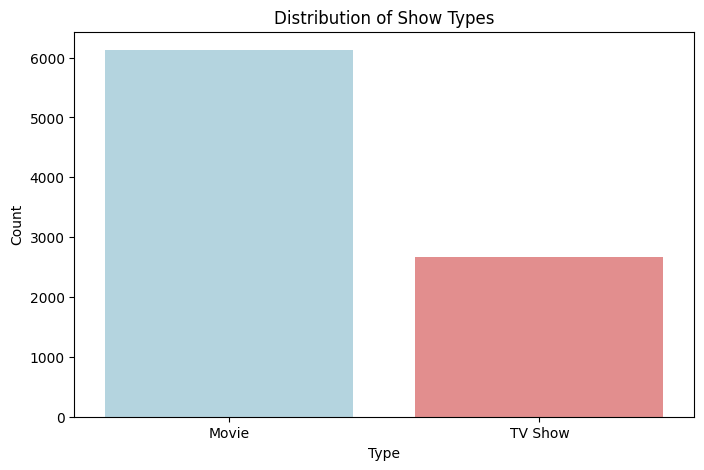

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['type'].value_counts().index, y=df['type'].value_counts().values, palette=['lightblue', 'lightcoral'])
plt.title('Distribution of Show Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Top 10 Directors in Netflix


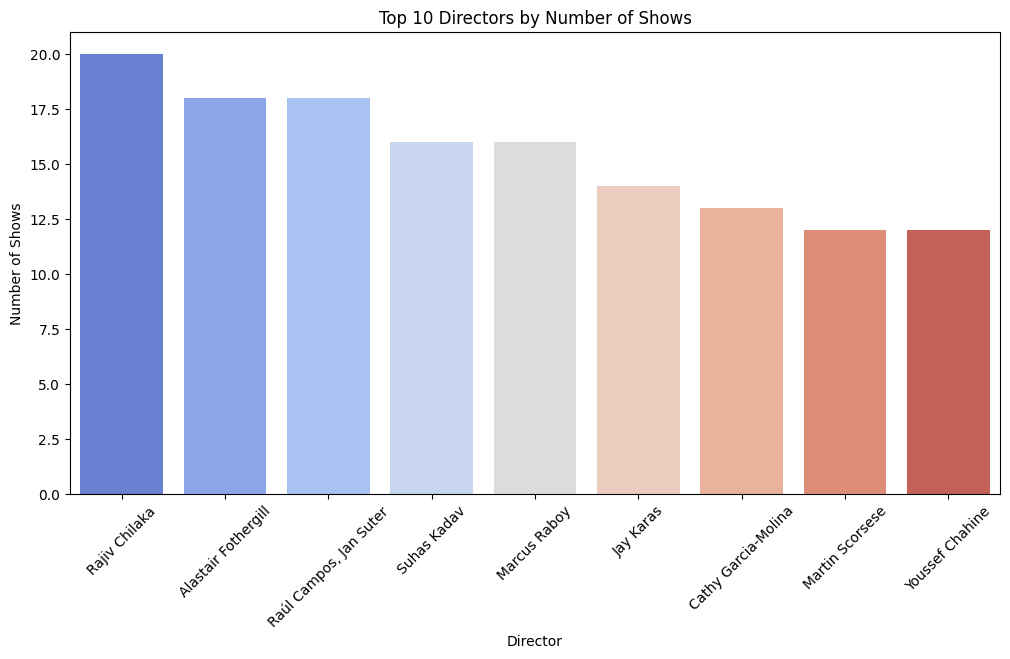

In [56]:
top_directors = df['director'].value_counts()[1:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')
plt.title('Top 10 Directors by Number of Shows')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()

Movie Durations

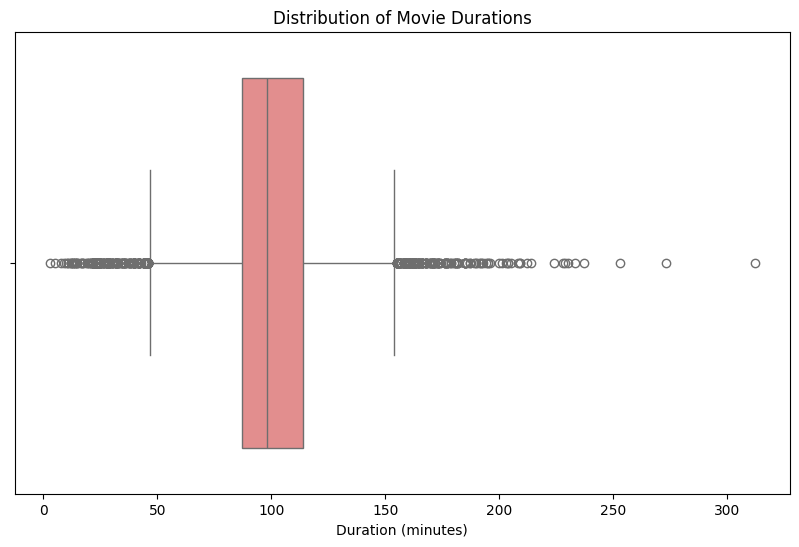

In [61]:
movies_df = df[df['type'] == 'Movie']
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies_df['duration'],color= 'lightcoral')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

Top 10 countries with Netflix Content


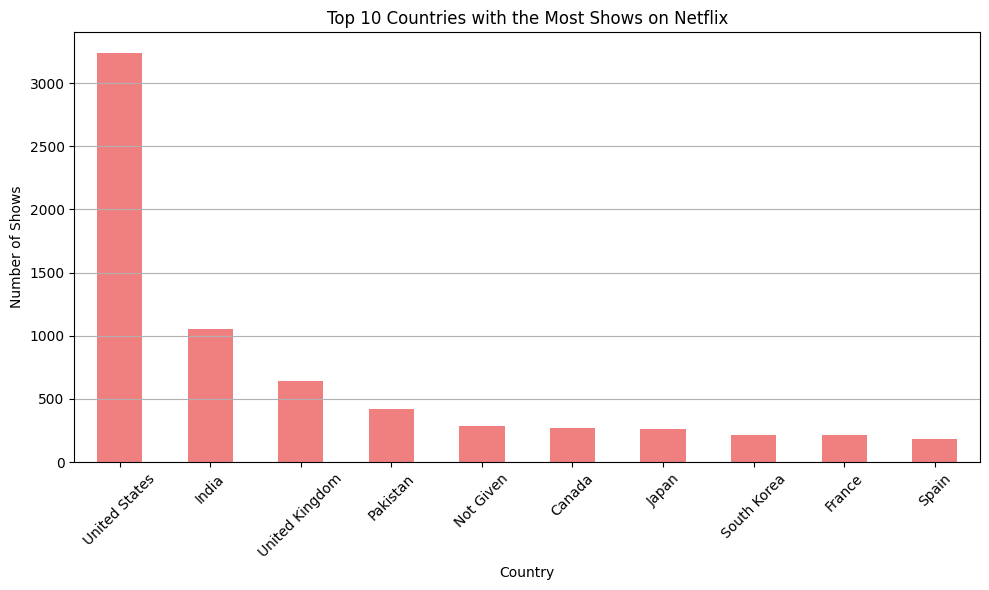

In [63]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Countries with the Most Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  
plt.show()